# Machine Learning Project
Presented by-
- **Parth Mishra** : A2305218480
- **Vishakha Sharma** : A2305218493
- **Ankit Rai** : A2305218494
- **Shreyan Das** : A2350218508

<center> <h1> About </h1> </center>

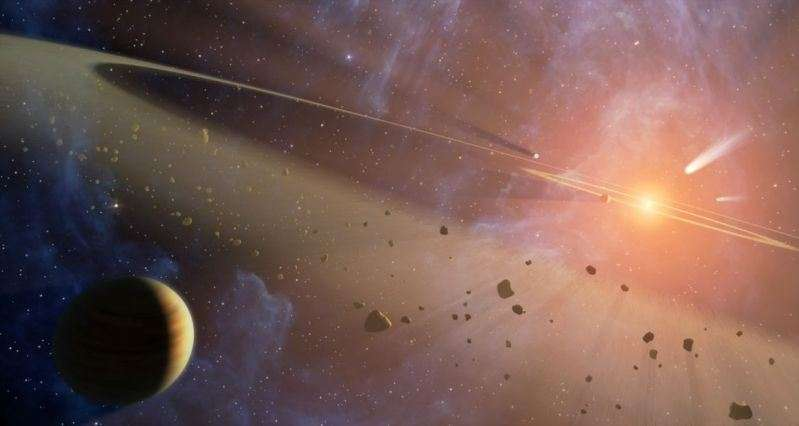

**Objective**
To apply Machine Learning models and accurately predict whether given asteroid is hazardous or not.

**Dataset**
NASA dataset - https://www.kaggle.com/shrutimehta/nasa-asteroids-classification?select=nasa.csv

## Background and Introduction

### Logistic Regression

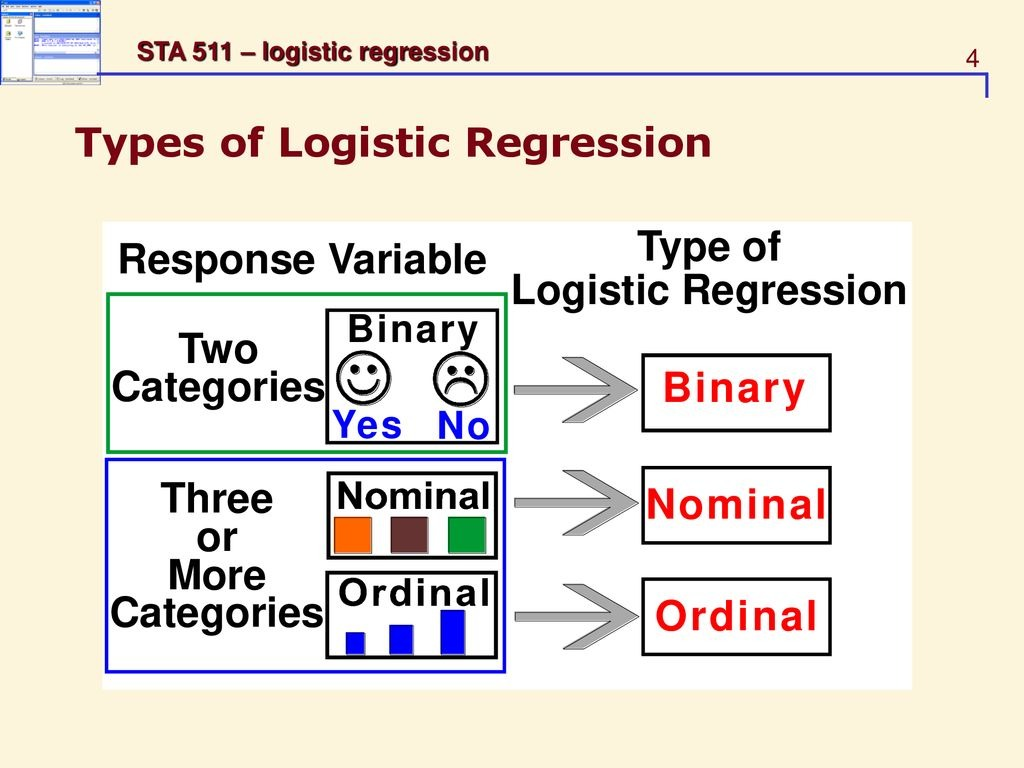

#### Sigmoid Function

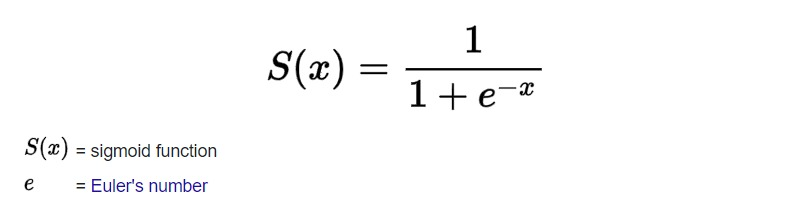
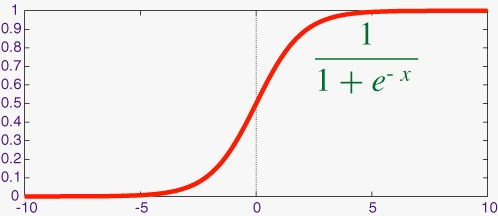

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Dataset

In [30]:
dataset = pd.read_csv('nasa.csv')

In [31]:
dataset.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

In [33]:
dataset.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [34]:
dataset = dataset.drop(['Neo Reference ID','Name','Equinox','Orbiting Body'],axis=1)

In [35]:
dataset[['Hazardous']] *=1

In [25]:
dataset.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


## Data Visualization

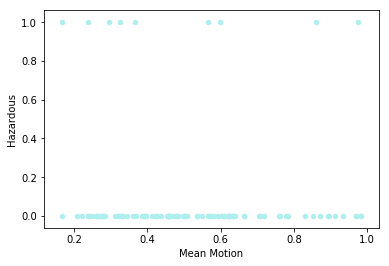

In [36]:
dataset[dataset['Mean Motion'] < 1].sample(100).plot.scatter(x='Mean Motion', y='Hazardous', color='paleturquoise')

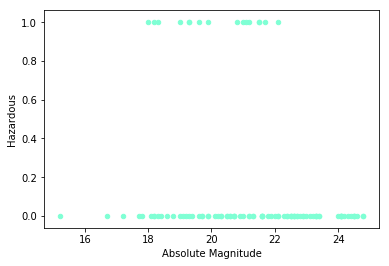

In [37]:
dataset[dataset['Absolute Magnitude'] < 25].sample(100).plot.scatter(x='Absolute Magnitude', y='Hazardous', color='aquamarine')

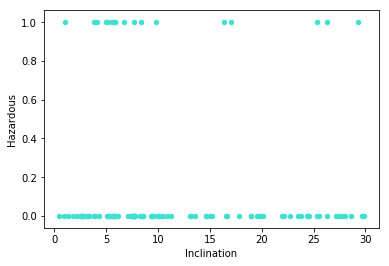

In [38]:
dataset[dataset['Inclination'] < 30].sample(100).plot.scatter(x='Inclination', y='Hazardous', color='turquoise')

Text(0, 0.5, 'Number of Asteroids')

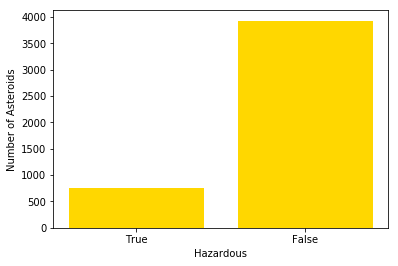

In [39]:
true_samples = np.sum(dataset['Hazardous'] == 1)
false_samples = np.sum(dataset['Hazardous']==0)
plt.bar(["True","False"],height = [true_samples,false_samples], color= 'gold')
plt.xlabel("Hazardous")
plt.ylabel("Number of Asteroids")

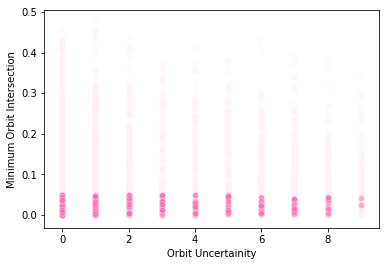

In [40]:
sns.scatterplot(x=dataset[dataset['Hazardous']==0]["Orbit Uncertainity"], y=dataset[dataset['Hazardous']==0]["Minimum Orbit Intersection"], color='lavenderblush', alpha = 0.3)
sns.scatterplot(x=dataset[dataset['Hazardous']==1]["Orbit Uncertainity"], y=dataset[dataset['Hazardous']==1]["Minimum Orbit Intersection"], color='hotpink', alpha = 0.5)

Text(0, 0.5, 'Frequency')

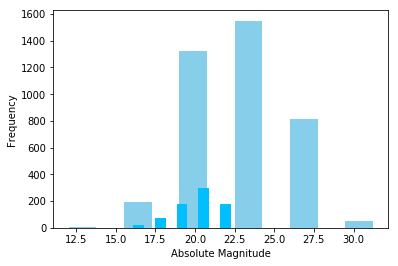

In [41]:
hist_data = dataset[dataset['Hazardous']==0]['Absolute Magnitude']
plt.hist(hist_data,rwidth=0.5,bins=6,color='skyblue')
hist_data = dataset[dataset['Hazardous']==1]['Absolute Magnitude']
plt.hist(hist_data,rwidth=0.5,bins=6,color='deepskyblue')
plt.xlabel("Absolute Magnitude")
plt.ylabel("Frequency")

## Analysing the features

In [42]:
dataset.isna().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Dis

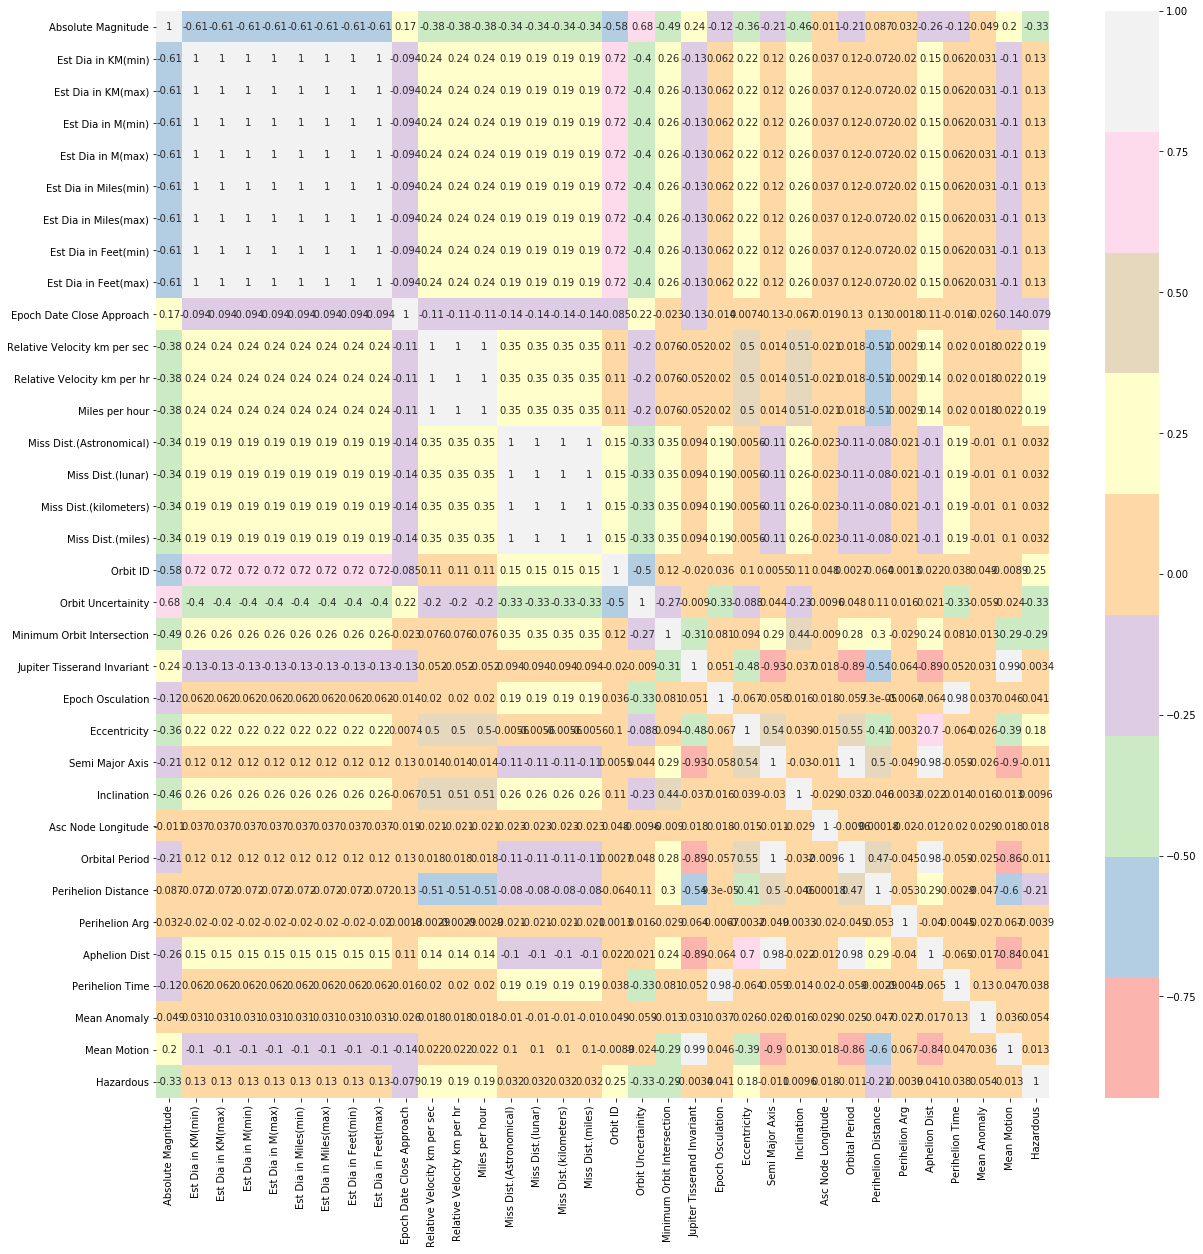

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True,cmap='Pastel1')
plt.show()

## Preprocessing

In [44]:
dataset=dataset.drop(['Orbit Determination Date','Close Approach Date','Epoch Date Close Approach'],axis=1)

In [45]:
dataset.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [46]:
x=dataset.drop(['Hazardous'],axis=1)
y=dataset['Hazardous'].values

In [47]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [67]:
dataset.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [48]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
x = scaler.fit_transform(x)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
x = pd.DataFrame(x,columns=dataset.columns[:-1])
x.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-1.077139,...,0.012875,-0.671955,1.377191,-0.070049,-0.021172,-1.223886,0.019571,0.459190,0.778393,-0.431100
1,-0.334824,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,0.568146,...,-0.558078,1.375315,-0.343192,-0.565393,-0.393267,1.247897,-0.514802,0.070818,-0.069093,0.312582
2,-0.680766,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,-0.874892,...,0.111735,-0.835467,0.845573,0.021563,0.567722,0.623011,-0.021323,0.415579,1.039404,-0.522114
3,1.775418,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.383539,...,-0.275446,-0.500038,-1.113477,-0.327568,0.704524,-1.596341,-0.482690,0.184540,-1.045928,-0.110818
4,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.566337,...,-0.333237,0.312713,-0.847599,-0.377402,0.637529,-0.248001,-0.529316,0.091457,-0.428186,-0.034580


## Training

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()

In [56]:
logmodel.fit(x_train,y_train)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
logmodel.score(x_test,y_test)

0.9466950959488273

## Cross-validation

In [58]:
param_grid = {'C': [0.1,1, 10, 100], 'tol': [1,0.1,0.01,0.001,0.0001], 'penalty': ['l1','l2']} 

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)

In [61]:
grid.fit(x_train,y_train)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logist

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.1, penalty=l1, tol=1 ........................................
[CV] ........... C=0.1, penalty=l1, tol=1, score=0.9104, total=   0.0s
[CV] C=0.1, penalty=l1, tol=1 ........................................
[CV] ........... C=0.1, penalty=l1, tol=1, score=0.9144, total=   0.0s
[CV] C=0.1, penalty=l1, tol=1 ........................................
[CV]  C=0.1, penalty=l1, tol=1, score=0.9039231385108086, total=   0.0s
[CV] C=0.1, penalty=l1, tol=0.1 ......................................
[CV] ......... C=0.1, penalty=l1, tol=0.1, score=0.9536, total=   0.0s
[CV] C=0.1, penalty=l1, tol=0.1 ......................................
[CV] ......... C=0.1, penalty=l1, tol=0.1, score=0.9552, total=   0.0s
[CV] C=0.1, penalty=l1, tol=0.1 ......................................
[CV]  C=0.1, penalty=l1, tol=0.1, score=0.9287429943955164, total=   0.0s
[CV] C=0.1, penalty=l1, tol=0.01 .....................................
[CV] ......

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=0.1, penalty=l1, tol=0.0001 ...................................
[CV]  C=0.1, penalty=l1, tol=0.0001, score=0.933546837469976, total=   0.0s
[CV] C=0.1, penalty=l2, tol=1 ........................................
[CV] ........... C=0.1, penalty=l2, tol=1, score=0.9216, total=   0.0s
[CV] C=0.1, penalty=l2, tol=1 ........................................
[CV] ........... C=0.1, penalty=l2, tol=1, score=0.9344, total=   0.0s
[CV] C=0.1, penalty=l2, tol=1 ........................................
[CV]  C=0.1, penalty=l2, tol=1, score=0.911929543634908, total=   0.0s
[CV] C=0.1, penalty=l2, tol=0.1 ......................................
[CV] ......... C=0.1, penalty=l2, tol=0.1, score=0.9488, total=   0.0s
[CV] C=0.1, penalty=l2, tol=0.1 ......................................
[CV] ......... C=0.1, penalty=l2, tol=0.1, score=0.9488, total=   0.0s
[CV] C=0.1, penalty=l2, tol=0.1 ......................................
[CV]  C=0.1, penalty=l2, tol=0.1, score=0.9239391513210569, total=   0.

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=0.1, penalty=l2, tol=0.001 ....................................
[CV]  C=0.1, penalty=l2, tol=0.001, score=0.9263410728582866, total=   0.0s
[CV] C=0.1, penalty=l2, tol=0.0001 ...................................
[CV] ...... C=0.1, penalty=l2, tol=0.0001, score=0.9488, total=   0.0s
[CV] C=0.1, penalty=l2, tol=0.0001 ...................................
[CV] ...... C=0.1, penalty=l2, tol=0.0001, score=0.9472, total=   0.0s
[CV] C=0.1, penalty=l2, tol=0.0001 ...................................
[CV]  C=0.1, penalty=l2, tol=0.0001, score=0.9263410728582866, total=   0.0s
[CV] C=1, penalty=l1, tol=1 ..........................................
[CV] ............. C=1, penalty=l1, tol=1, score=0.9048, total=   0.0s
[CV] C=1, penalty=l1, tol=1 ..........................................
[CV] ............. C=1, penalty=l1, tol=1, score=0.9096, total=   0.0s
[CV] C=1, penalty=l1, tol=1 ..........................................
[CV] . C=1, penalty=l1, tol=1, score=0.9055244195356285, total=  

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=1, penalty=l1, tol=0.01 .......................................
[CV]  C=1, penalty=l1, tol=0.01, score=0.9399519615692554, total=   0.0s
[CV] C=1, penalty=l1, tol=0.001 ......................................
[CV] .......... C=1, penalty=l1, tol=0.001, score=0.968, total=   0.0s
[CV] C=1, penalty=l1, tol=0.001 ......................................
[CV] ......... C=1, penalty=l1, tol=0.001, score=0.9584, total=   0.0s
[CV] C=1, penalty=l1, tol=0.001 ......................................
[CV]  C=1, penalty=l1, tol=0.001, score=0.9399519615692554, total=   0.0s
[CV] C=1, penalty=l1, tol=0.0001 .....................................
[CV] ......... C=1, penalty=l1, tol=0.0001, score=0.968, total=   0.0s

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=1, penalty=l1, tol=0.0001 .....................................
[CV] ........ C=1, penalty=l1, tol=0.0001, score=0.9576, total=   0.0s
[CV] C=1, penalty=l1, tol=0.0001 .....................................
[CV]  C=1, penalty=l1, tol=0.0001, score=0.9399519615692554, total=   0.0s
[CV] C=1, penalty=l2, tol=1 ..........................................
[CV] .............. C=1, penalty=l2, tol=1, score=0.924, total=   0.0s
[CV] C=1, penalty=l2, tol=1 ..........................................
[CV] ............. C=1, penalty=l2, tol=1, score=0.9344, total=   0.0s
[CV] C=1, penalty=l2, tol=1 ..........................................
[CV] . C=1, penalty=l2, tol=1, score=0.9151321056845476, total=   0.0s
[CV] C=1, penalty=l2, tol=0.1 ........................................
[CV] ........... C=1, penalty=l2, tol=0.1, score=0.9632, total=   0.0s
[CV] C=1, penalty=l2, tol=0.1 ........................................
[CV] ........... C=1, penalty=l2, tol=0.1, score=0.9552, total=   0.0s

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=1, penalty=l2, tol=0.1 ........................................
[CV]  C=1, penalty=l2, tol=0.1, score=0.9423538831064852, total=   0.0s
[CV] C=1, penalty=l2, tol=0.01 .......................................
[CV] .......... C=1, penalty=l2, tol=0.01, score=0.9632, total=   0.0s
[CV] C=1, penalty=l2, tol=0.01 .......................................
[CV] .......... C=1, penalty=l2, tol=0.01, score=0.9552, total=   0.0s
[CV] C=1, penalty=l2, tol=0.01 .......................................
[CV]  C=1, penalty=l2, tol=0.01, score=0.9399519615692554, total=   0.0s
[CV] C=1, penalty=l2, tol=0.001 ......................................
[CV] ......... C=1, penalty=l2, tol=0.001, score=0.9632, total=   0.0s
[CV] C=1, penalty=l2, tol=0.001 ......................................
[CV] ......... C=1, penalty=l2, tol=0.001, score=0.9568, total=   0.0s
[CV] C=1, penalty=l2, tol=0.001 ......................................
[CV]  C=1, penalty=l2, tol=0.001, score=0.9399519615692554, total=   0.0s

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=1, penalty=l2, tol=0.0001 .....................................
[CV] ........ C=1, penalty=l2, tol=0.0001, score=0.9568, total=   0.0s
[CV] C=1, penalty=l2, tol=0.0001 .....................................
[CV]  C=1, penalty=l2, tol=0.0001, score=0.9399519615692554, total=   0.0s
[CV] C=10, penalty=l1, tol=1 .........................................
[CV] ............ C=10, penalty=l1, tol=1, score=0.9096, total=   0.0s
[CV] C=10, penalty=l1, tol=1 .........................................
[CV] ............ C=10, penalty=l1, tol=1, score=0.9248, total=   0.0s
[CV] C=10, penalty=l1, tol=1 .........................................
[CV]  C=10, penalty=l1, tol=1, score=0.9015212169735789, total=   0.0s
[CV] C=10, penalty=l1, tol=0.1 .......................................
[CV] .......... C=10, penalty=l1, tol=0.1, score=0.9592, total=   0.0s
[CV] C=10, penalty=l1, tol=0.1 .......................................
[CV] .......... C=10, penalty=l1, tol=0.1, score=0.9544, total=   0.0s
[

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=10, penalty=l1, tol=0.01 ......................................
[CV]  C=10, penalty=l1, tol=0.01, score=0.9415532425940752, total=   0.0s
[CV] C=10, penalty=l1, tol=0.001 .....................................
[CV] ........ C=10, penalty=l1, tol=0.001, score=0.9672, total=   0.0s
[CV] C=10, penalty=l1, tol=0.001 .....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ........ C=10, penalty=l1, tol=0.001, score=0.9568, total=   0.6s
[CV] C=10, penalty=l1, tol=0.001 .....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=10, penalty=l1, tol=0.001, score=0.9423538831064852, total=   0.1s
[CV] C=10, penalty=l1, tol=0.0001 ....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ....... C=10, penalty=l1, tol=0.0001, score=0.9688, total=   0.5s
[CV] C=10, penalty=l1, tol=0.0001 ....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ........ C=10, penalty=l1, tol=0.0001, score=0.956, total=   2.1s
[CV] C=10, penalty=l1, tol=0.0001 ....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=10, penalty=l1, tol=0.0001, score=0.9431545236188951, total=   0.6s
[CV] C=10, penalty=l2, tol=1 .........................................
[CV] ............. C=10, penalty=l2, tol=1, score=0.924, total=   0.0s
[CV] C=10, penalty=l2, tol=1 .........................................
[CV] ............. C=10, penalty=l2, tol=1, score=0.936, total=   0.0s
[CV] C=10, penalty=l2, tol=1 .........................................
[CV]  C=10, penalty=l2, tol=1, score=0.9151321056845476, total=   0.0s
[CV] C=10, penalty=l2, tol=0.1 .......................................
[CV] ........... C=10, penalty=l2, tol=0.1, score=0.964, total=   0.0s
[CV] C=10, penalty=l2, tol=0.1 .......................................
[CV] .......... C=10, penalty=l2, tol=0.1, score=0.9576, total=   0.0s
[CV] C=10, penalty=l2, tol=0.1 .......................................
[CV]  C=10, penalty=l2, tol=0.1, score=0.9407526020816653, total=   0.0s
[CV] C=10, penalty=l2, tol=0.01 ......................................

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=10, penalty=l2, tol=0.001 .....................................
[CV] ........ C=10, penalty=l2, tol=0.001, score=0.9576, total=   0.0s
[CV] C=10, penalty=l2, tol=0.001 .....................................
[CV]  C=10, penalty=l2, tol=0.001, score=0.9423538831064852, total=   0.0s
[CV] C=10, penalty=l2, tol=0.0001 ....................................
[CV] ....... C=10, penalty=l2, tol=0.0001, score=0.9672, total=   0.0s
[CV] C=10, penalty=l2, tol=0.0001 ....................................
[CV] ....... C=10, penalty=l2, tol=0.0001, score=0.9576, total=   0.0s
[CV] C=10, penalty=l2, tol=0.0001 ....................................
[CV]  C=10, penalty=l2, tol=0.0001, score=0.9423538831064852, total=   0.0s
[CV] C=100, penalty=l1, tol=1 ........................................
[CV] ........... C=100, penalty=l1, tol=1, score=0.9096, total=   0.0s
[CV] C=100, penalty=l1, tol=1 ........................................
[CV] ........... C=100, penalty=l1, tol=1, score=0.9128, total=   0

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


[CV] C=100, penalty=l1, tol=0.1 ......................................
[CV] .......... C=100, penalty=l1, tol=0.1, score=0.964, total=   0.0s
[CV] C=100, penalty=l1, tol=0.1 ......................................
[CV] ......... C=100, penalty=l1, tol=0.1, score=0.9544, total=   0.0s
[CV] C=100, penalty=l1, tol=0.1 ......................................
[CV]  C=100, penalty=l1, tol=0.1, score=0.9391513210568455, total=   0.0s
[CV] C=100, penalty=l1, tol=0.01 .....................................
[CV] ......... C=100, penalty=l1, tol=0.01, score=0.968, total=   0.0s
[CV] C=100, penalty=l1, tol=0.01 .....................................
[CV] ........ C=100, penalty=l1, tol=0.01, score=0.9576, total=   0.0s
[CV] C=100, penalty=l1, tol=0.01 .....................................
[CV]  C=100, penalty=l1, tol=0.01, score=0.9415532425940752, total=   0.0s
[CV] C=100, penalty=l1, tol=0.001 ....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[CV] ....... C=100, penalty=l1, tol=0.001, score=0.9688, total=   0.0s
[CV] C=100, penalty=l1, tol=0.001 ....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ....... C=100, penalty=l1, tol=0.001, score=0.9568, total=   0.2s
[CV] C=100, penalty=l1, tol=0.001 ....................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=100, penalty=l1, tol=0.001, score=0.944755804643715, total=   0.4s
[CV] C=100, penalty=l1, tol=0.0001 ...................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=100, penalty=l1, tol=0.0001, score=0.9672, total=   1.0s
[CV] C=100, penalty=l1, tol=0.0001 ...................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=100, penalty=l1, tol=0.0001, score=0.9568, total=   3.2s
[CV] C=100, penalty=l1, tol=0.0001 ...................................


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=100, penalty=l1, tol=0.0001, score=0.944755804643715, total=   0.7s
[CV] C=100, penalty=l2, tol=1 ........................................
[CV] ............ C=100, penalty=l2, tol=1, score=0.924, total=   0.0s
[CV] C=100, penalty=l2, tol=1 ........................................
[CV] ............ C=100, penalty=l2, tol=1, score=0.936, total=   0.0s
[CV] C=100, penalty=l2, tol=1 ........................................
[CV]  C=100, penalty=l2, tol=1, score=0.9151321056845476, total=   0.0s
[CV] C=100, penalty=l2, tol=0.1 ......................................
[CV] .......... C=100, penalty=l2, tol=0.1, score=0.964, total=   0.0s
[CV] C=100, penalty=l2, tol=0.1 ......................................
[CV] ......... C=100, penalty=l2, tol=0.1, score=0.9568, total=   0.0s
[CV] C=100, penalty=l2, tol=0.1 ......................................
[CV]  C=100, penalty=l2, tol=0.1, score=0.9407526020816653, total=   0.0s
[CV] C=100, penalty=l2, tol=0.01 ...................................

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[CV] ........ C=100, penalty=l2, tol=0.001, score=0.956, total=   0.0s
[CV] C=100, penalty=l2, tol=0.001 ....................................
[CV]  C=100, penalty=l2, tol=0.001, score=0.944755804643715, total=   0.0s
[CV] C=100, penalty=l2, tol=0.0001 ...................................
[CV] ...... C=100, penalty=l2, tol=0.0001, score=0.9672, total=   0.0s
[CV] C=100, penalty=l2, tol=0.0001 ...................................
[CV] ....... C=100, penalty=l2, tol=0.0001, score=0.956, total=   0.0s
[CV] C=100, penalty=l2, tol=0.0001 ...................................
[CV]  C=100, penalty=l2, tol=0.0001, score=0.944755804643715, total=   0.0s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'tol': [1, 0.1, 0.01, 0.001, 0.0001], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'tol': 0.001}

## Predictions and evaluation

In [63]:
grid_predictions = grid.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
print(confusion_matrix(y_test,grid_predictions))

[[766  25]
 [ 24 123]]


In [66]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       791
           1       0.83      0.84      0.83       147

   micro avg       0.95      0.95      0.95       938
   macro avg       0.90      0.90      0.90       938
weighted avg       0.95      0.95      0.95       938

